# Setup do Projeto

### Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### Importando os Datasets

# Previsão do INPC pelo IPCA

A ideia é criar um modelo para prever o INPC utilizando o IPCA

In [2]:
df = pd.read_csv("inflacao.csv")

In [3]:
df.head()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,inpc_variacao,inpc_acumulado_ano,inpc_acumulado_doze_meses,consolidado_ano
0,1980-01,1980,1,198001,6.62,6.62,0.0,0.0,0.0,0.0,6.56,6.56,0.00,False
1,1980-02,1980,2,198002,4.62,11.54,0.0,0.0,0.0,0.0,4.15,10.98,0.00,False
2,1980-03,1980,3,198003,6.04,18.27,0.0,0.0,0.0,0.0,5.12,16.67,75.11,False
3,1980-04,1980,4,198004,5.29,24.53,0.0,0.0,0.0,0.0,4.85,22.33,77.48,False
4,1980-05,1980,5,198005,5.70,31.63,0.0,0.0,0.0,0.0,5.53,29.10,84.06,False


In [4]:
df.tail()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,inpc_variacao,inpc_acumulado_ano,inpc_acumulado_doze_meses,consolidado_ano
510,2022-07,2022,7,202207,-0.68,4.77,10.07,0.13,5.79,11.39,-0.60,4.98,10.12,False
511,2022-08,2022,8,202208,-0.36,4.39,8.73,-0.73,5.02,9.60,-0.31,4.65,8.83,False
512,2022-09,2022,9,202209,-0.29,4.09,7.17,-0.37,4.63,7.96,-0.32,4.32,7.19,False
513,2022-10,2022,10,202210,0.59,4.70,6.47,0.16,4.80,6.85,0.47,4.81,6.46,False
514,2022-11,2022,11,202211,0.41,5.13,5.90,0.53,5.35,6.17,0.38,5.21,5.97,False


In [5]:
df.describe()

,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,inpc_variacao,inpc_acumulado_ano,inpc_acumulado_doze_meses
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,2000.959223,6.489320,200102.411650,5.948214,96.495709,310.089010,0.269767,1.855107,3.380874,5.937029,95.998350,309.124350
std,12.399177,3.450227,1239.904297,10.862122,265.975237,864.719013,0.392667,2.413151,3.815471,10.868282,263.216087,850.787432
min,1980.000000,1.000000,198001.000000,-0.680000,-0.160000,0.000000,-0.730000,0.000000,0.000000,-0.600000,0.060000,0.000000
25%,1990.000000,3.500000,199009.500000,0.380000,2.485000,5.250000,0.000000,0.000000,0.000000,0.385000,2.585000,5.405000
50%,2001.000000,6.000000,200106.000000,0.780000,5.230000,7.770000,0.050000,0.650000,2.800000,0.820000,5.210000,9.030000
75%,2012.000000,9.000000,201202.500000,6.840000,49.070000,156.790000,0.485000,3.265000,6.205000,6.755000,46.755000,161.665000
max,2022.000000,12.000000,202211.000000,82.390000,2477.150000,6821.310000,3.050000,11.990000,17.240000,82.180000,2489.110000,6554.520000


#### Definindo as varáveis de análise

In [6]:
inpc_variacao = df.inpc_variacao
inpc_variacao.describe()

count    515.000000
mean       5.937029
std       10.868282
min       -0.600000
25%        0.385000
50%        0.820000
75%        6.755000
max       82.180000
Name: inpc_variacao, dtype: float64

In [7]:
ipca_variacao = df.ipca_variacao
ipca_variacao.describe()

count    515.000000
mean       5.948214
std       10.862122
min       -0.680000
25%        0.380000
50%        0.780000
75%        6.840000
max       82.390000
Name: ipca_variacao, dtype: float64

# Regressão Linear Simples

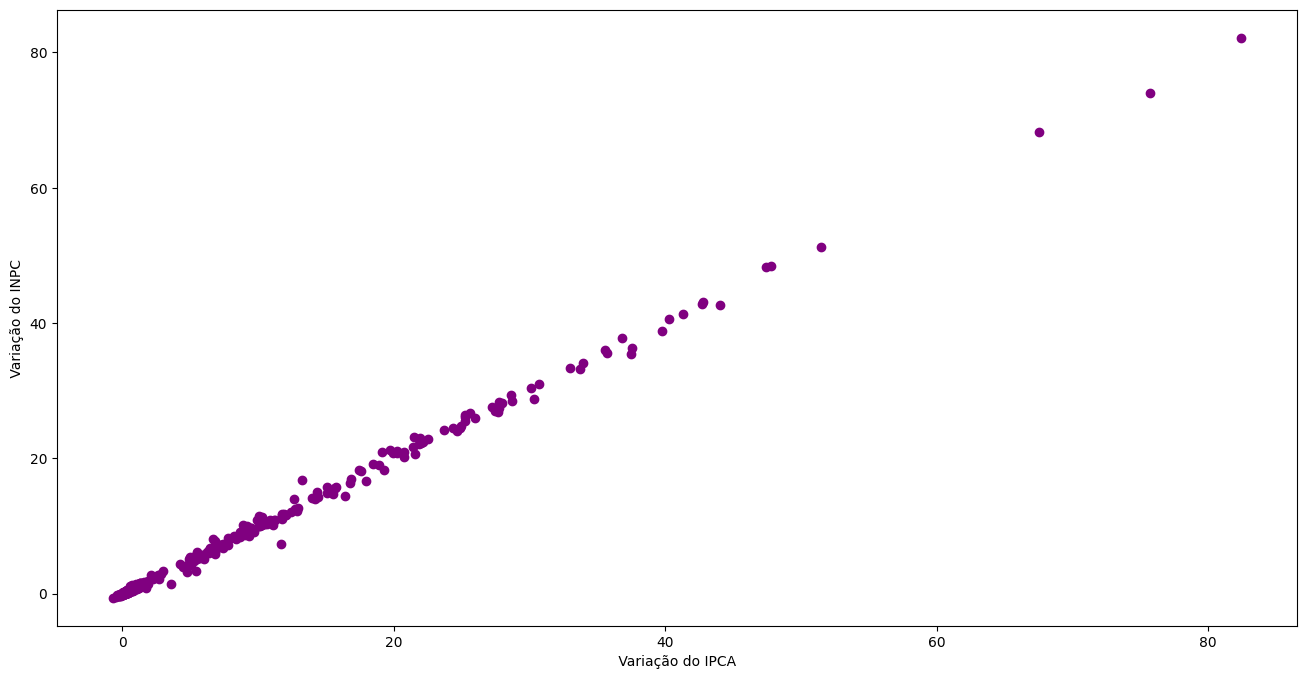

In [8]:
plt.figure(figsize = (16,8))
plt.scatter(
    ipca_variacao, 
    inpc_variacao, 
    c='purple')
plt.xlabel(" Variação do IPCA ")
plt.ylabel(" Variação do INPC ")
plt.show()


#### Criando um modelo simples

In [9]:
X = df['ipca_variacao'].values.reshape(-1,1)
y = df['inpc_variacao'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Inflação = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))


O modelo é: Inflação = -0.0085554 + 0.99956X


#### Verificando a precisão do modelo

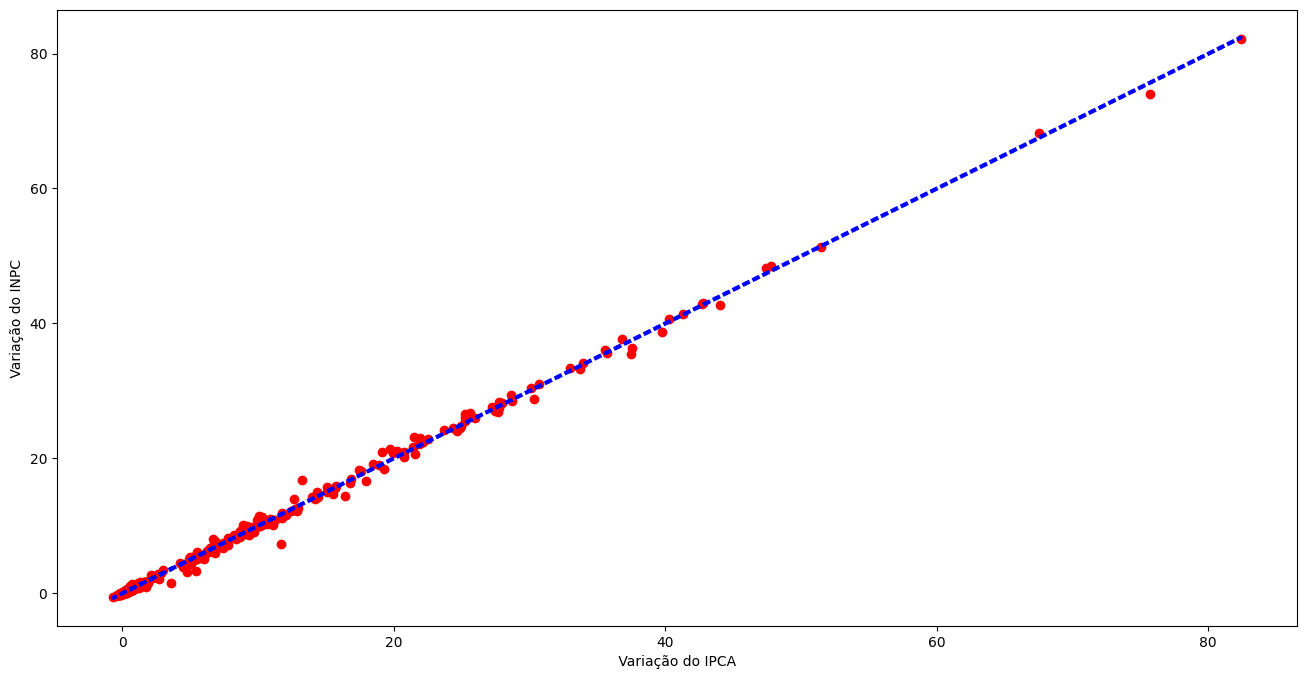

In [10]:
f_previsaoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter(
    df['ipca_variacao'], 
    df['inpc_variacao'], 
    c='red')


plt.plot(
    df['ipca_variacao'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" Variação do IPCA ")
plt.ylabel(" Variação do INPC ")
plt.show()

#### Sumario do Modelo - Avaliar Precisão 

In [11]:
X = df['ipca_variacao']
y = df['inpc_variacao']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          inpc_variacao   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.540e+05
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:08:42   Log-Likelihood:                -360.75
No. Observations:                 515   AIC:                             725.5
Df Residuals:                     513   BIC:                             734.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0086      0.025     -0.349

#### Resultado do Modelo

* O R2 é de 0.99. 
* Isso significa que 99% do comportamento da variável `ipca_variacao`é explicado pela variável `inpc_variacao`. 
* Nosso `p-valor` é de 0.728. Isso significa que podemos aceitar a hipótese nula. Se o mesmo estivesse baixo, rejeitariamos a hipótese nula e chegariamos a conclusão de que os dados não são bons o suficiente para gerar um modelo bom.  

#### Qual será a o INPC do mês quando a variação do IPCA for de 0.13?

In [12]:
reg.predict([[0.13]])

array([[0.12138713]])

#### Qual será o INPC do mês quando a variação do IPCA for de 1.99%?

In [13]:
reg.predict([[1.99]])

array([[1.98056503]])

#### Qual será o INPC do mês quando a variação do IPCA for de -63%?

In [14]:
reg.predict([[-0.63]])

array([[-0.63827695]])

#### Qual será o INPC do mês quando a variação do IPCA for de 0.59%?

In [15]:
reg.predict([[0.59]])

array([[0.58118382]])

# Previsão do IPCA pelo IPCA15

O objetivo é prever o IPCA a partir do IPCA15

## Tratamento dos dados

#### Excluindo os anos que o IPCA15 não foi calculado. 

O calculo do `IPCA15` começou a ser efetuado no ano de 2000, enquanto sua série principal, o `IPCA` é observado historicamente e disponibilizado desde 1980. Então vamos deixar somente as observações do dataset nos quais o IPCA15 tem registros de variação. 

O `IPCA15` sai 15 dias antes do `IPCA` padrão. Então o mesmo sai como uma prévia do IPCA funcional. 

In [16]:
df_ipca_analise = df[df.ipca15_variacao != 0]

In [17]:
df_ipca_analise.describe()

,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,inpc_variacao,inpc_acumulado_ano,inpc_acumulado_doze_meses
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,2011.121771,6.538745,201118.715867,0.513173,3.444871,6.423506,0.512657,3.525387,6.424908,0.528081,3.571328,6.604797
std,6.536219,3.436915,653.496151,0.406976,2.259534,2.816161,0.410544,2.275003,2.843185,0.456737,2.469381,3.362392
min,2000.000000,1.000000,200005.000000,-0.680000,-0.160000,1.880000,-0.730000,0.300000,1.920000,-0.600000,0.060000,1.560000
25%,2005.500000,4.000000,200556.500000,0.270000,1.645000,4.545000,0.245000,1.715000,4.425000,0.240000,1.620000,4.675000
50%,2011.000000,7.000000,201108.000000,0.470000,3.130000,6.090000,0.460000,3.140000,6.150000,0.480000,3.240000,5.970000
75%,2017.000000,9.500000,201703.500000,0.705000,4.815000,7.510000,0.695000,5.025000,7.475000,0.730000,4.945000,7.635000
max,2022.000000,12.000000,202211.000000,3.020000,12.530000,17.240000,3.050000,11.990000,17.240000,3.390000,14.740000,20.440000


In [18]:
df_ipca_analise.tail()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,inpc_variacao,inpc_acumulado_ano,inpc_acumulado_doze_meses,consolidado_ano
510,2022-07,2022,7,202207,-0.68,4.77,10.07,0.13,5.79,11.39,-0.60,4.98,10.12,False
511,2022-08,2022,8,202208,-0.36,4.39,8.73,-0.73,5.02,9.60,-0.31,4.65,8.83,False
512,2022-09,2022,9,202209,-0.29,4.09,7.17,-0.37,4.63,7.96,-0.32,4.32,7.19,False
513,2022-10,2022,10,202210,0.59,4.70,6.47,0.16,4.80,6.85,0.47,4.81,6.46,False
514,2022-11,2022,11,202211,0.41,5.13,5.90,0.53,5.35,6.17,0.38,5.21,5.97,False


In [19]:
ipca_variacao = df_ipca_analise.ipca_variacao
ipca_variacao.describe()

count    271.000000
mean       0.513173
std        0.406976
min       -0.680000
25%        0.270000
50%        0.470000
75%        0.705000
max        3.020000
Name: ipca_variacao, dtype: float64

In [20]:
ipca15_variacao = df_ipca_analise.ipca15_variacao
ipca15_variacao.describe()

count    271.000000
mean       0.512657
std        0.410544
min       -0.730000
25%        0.245000
50%        0.460000
75%        0.695000
max        3.050000
Name: ipca15_variacao, dtype: float64

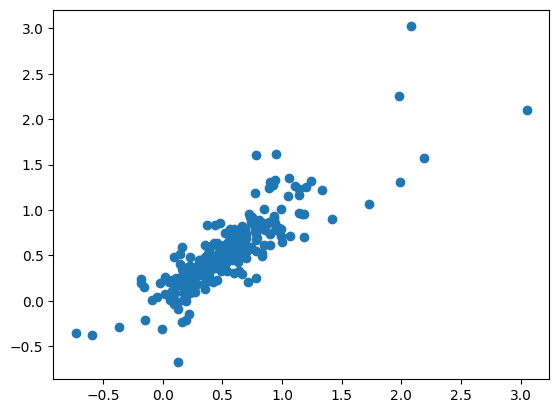

In [21]:
plt.scatter(ipca15_variacao, ipca_variacao)
plt.show()

#### Encontrando a melhor reta para regressão

In [22]:
reg = LinearRegression()

#### Transformando os Series do Pandas em Arrays para fazer o fit dos dados. 

In [23]:
reg.fit(
    ipca15_variacao.values.reshape(-1, 1), 
    ipca_variacao.values.reshape(-1, 1)
)

LinearRegression()

In [24]:
reg.coef_

array([[0.84810034]])

#### Melhor possibilidade de onde a reta vai cortar o eixo. 

In [25]:
reg.intercept_

array([0.078389])

#### Testando o coeficiente de interceptação para traçar o gráfico linearmente

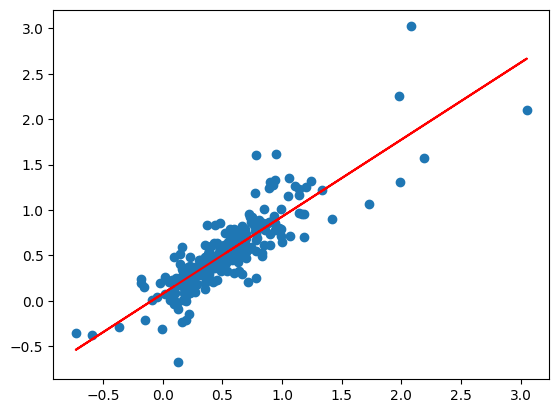

In [26]:
plt.scatter(ipca15_variacao, ipca_variacao)
x = np.array(ipca15_variacao)
y = reg.intercept_ + x * reg.coef_
plt.plot(x, y[0], "r")
plt.show()

In [27]:
X = ipca_variacao
y = ipca15_variacao
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        ipca15_variacao   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     734.5
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           7.09e-79
Time:                        18:08:44   Log-Likelihood:                 35.625
No. Observations:                 271   AIC:                            -67.25
Df Residuals:                     269   BIC:                            -60.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0698      0.021      3.348

#### Resultado do Modelo
O R2 é de 0.732.
Isso significa que 73% do comportamento da variável `ipca_variacao` é explicado pela variável `ipca15_variacao`.
Nosso p-valor é de 0.001. Isso significa que `não`podemos aceitar a hipótese nula. Se o mesmo estivesse alto, aceitariamos a hipótese nula e chegariamos a conclusão de que os dados  são bons o suficiente para gerar um modelo bom.

Gerada a melhor reta de regressão, podemos começar a fazer as perguntas para o modelo. 

#### Qual será a o IPCA do mês quando o IPCA15 for de 0.6?

In [28]:
reg.predict([[0.6]])

array([[0.58724921]])

#### Qual será o IPCA do mês quando o IPCA15 for de 1.99%?

In [29]:
reg.predict([[1.99]])

array([[1.76610867]])

#### Qual será o IPCA do mês quando o IPCA15 for de 0.53%?

In [30]:
reg.predict([[0.53]])

array([[0.52788218]])